In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [11]:
# Load the whole dataset
home_data = pd.read_csv('./Docs/housing.csv')

# Load the dataset with only the longitude, latitude and median house value
home_data_median = pd.read_csv('./Docs/housing.csv', usecols = ['longitude', 'latitude', 'median_house_value'])
home_data_median.head()

# Load the dataset with only the longitude, latitude and ocean proximity

home_data_ocean = pd.read_csv('./Docs/housing.csv', usecols = ['longitude', 'latitude', 'ocean_proximity'])
home_data_ocean.head()

# Convert ocean proximity to numeric values 
home_data_ocean['ocean_proximity'] = home_data_ocean['ocean_proximity'].map({'<1H OCEAN': 1, 'INLAND': 2, 'NEAR OCEAN': 3, 'NEAR BAY': 4, 'ISLAND': 5})
home_data_ocean.head()


,longitude,latitude,ocean_proximity
0,-122.23,37.88,4
1,-122.22,37.86,4
2,-122.24,37.85,4
3,-122.25,37.85,4
4,-122.25,37.85,4


<Axes: xlabel='longitude', ylabel='latitude'>

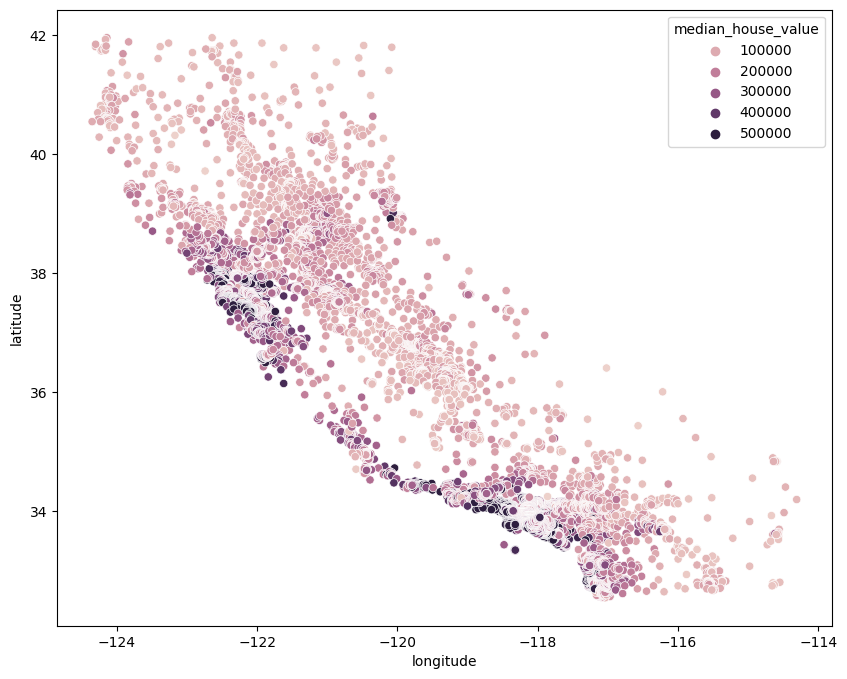

In [12]:
# Visualize the data
plt.figure(figsize = (10, 8))
sns.scatterplot(data = home_data_median, x = 'longitude', y = 'latitude', hue = 'median_house_value')

In [13]:
# Normalize the data
scaler = preprocessing.MinMaxScaler()
home_data_median_scaled = scaler.fit_transform(home_data_median)
home_data_median_scaled = pd.DataFrame(home_data_median_scaled, columns = home_data_median.columns)
home_data_median_scaled.head()

,longitude,latitude,median_house_value
0,0.211155,0.567481,0.902266
1,0.212151,0.565356,0.708247
2,0.210159,0.564293,0.695051
3,0.209163,0.564293,0.672783
4,0.209163,0.564293,0.674638


In [14]:
# Split into train and test sets
X_train, X_test = train_test_split(home_data_median_scaled, test_size = 0.2, random_state = 42)


Text(0.5, 1.0, 'Test Set')

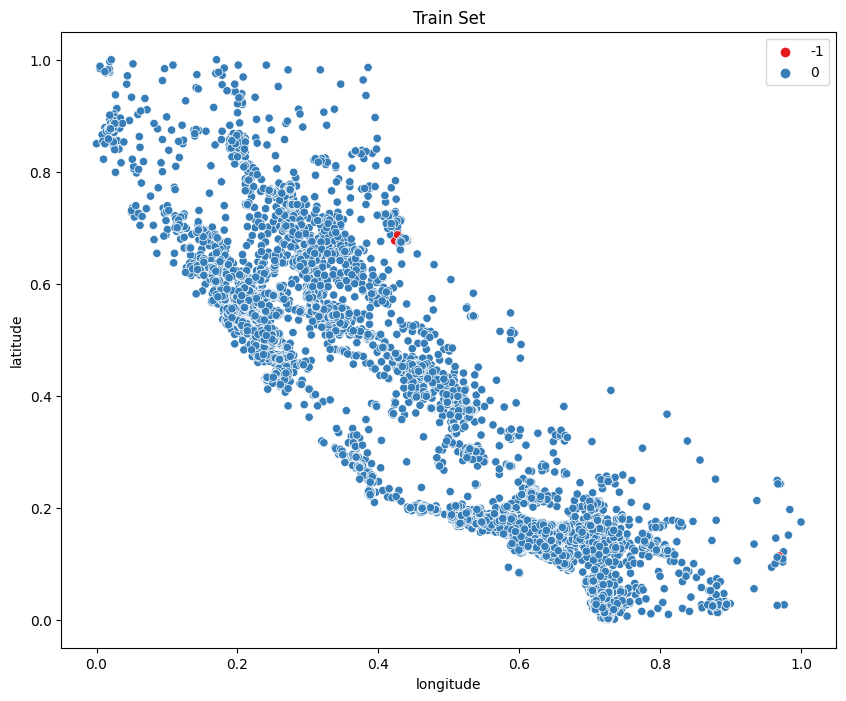

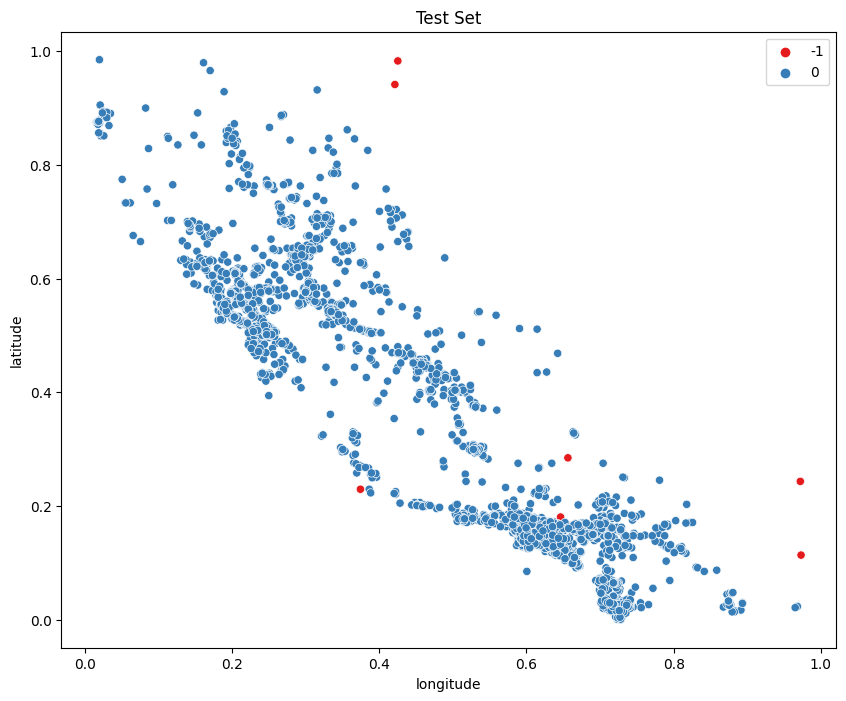

In [15]:
# Fitting and Evaluating the Model using dbscan
dbscan = DBSCAN(eps = 0.1, min_samples = 5).fit(X_train)

# Predict the clusters
train_clusters = dbscan.fit_predict(X_train)
test_clusters = dbscan.fit_predict(X_test)

# Visualize the clusters
plt.figure(figsize = (10, 8))
sns.scatterplot(x = X_train['longitude'], y = X_train['latitude'], hue = train_clusters, palette = 'Set1')
plt.title('Train Set')

plt.figure(figsize = (10, 8))
sns.scatterplot(x = X_test['longitude'], y = X_test['latitude'], hue = test_clusters, palette = 'Set1')
plt.title('Test Set')




In [16]:
# Calculate the silhouette score for the dbscan modell using the train set
print(silhouette_score(X_train, train_clusters))

# Calculate the silhouette score for the dbscan modell using the test set
print(silhouette_score(X_test, test_clusters)
)

0.2352868338173229
0.21571870463498555
